# Final training, Validatio , Test based on the results from Optuna

In [1]:
!pip install torch # for Model inference
!pip install transformers # for Tokenization
!pip install Optuna
!pip install pandas
!pip install matplotlib
!pip install json
!pip install gc
!pip install os


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 26.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 796.9/796.9 kB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 38.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 4.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 36.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.5/605.5 kB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 1.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 85.1 MB/s eta 0:00:00

In [2]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 88.5 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 87.9 MB/s eta 0:00:00:00:0100:01


In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaForSequenceClassification
from transformers import RobertaTokenizerFast
import sklearn

In [2]:
# Clear GPU memory and cache
import torch
import gc

# Clear GPU cache
torch.cuda.empty_cache()

# Clear memory
gc.collect()

# Print GPU memory stats to verify
print("GPU Memory Status:")
print(f"Allocated: {torch.cuda.memory_allocated(0) // 1024**2}MB")
print(f"Cached: {torch.cuda.memory_reserved(0) // 1024**2}MB")

GPU Memory Status:
Allocated: 0MB
Cached: 0MB


In [3]:
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("Device name:", torch.cuda.get_device_name(0))

CUDA available: True
Device name: NVIDIA GeForce RTX 5080


# Data Loading, Small Dataset Building, Distribution, Splitting

Vulnerability Distribution:
vul
0    177736
1      8794
Name: count, dtype: int64


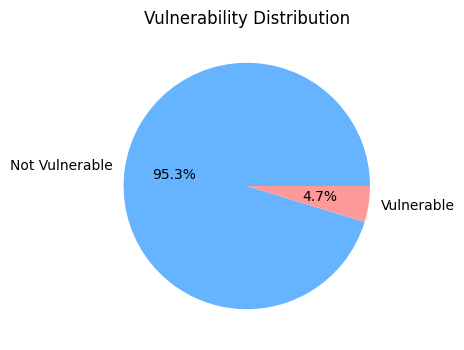

In [7]:

with open('data.json', 'r') as f:
    data = json.load(f)

#build DataFrame
df = pd.DataFrame(data)

# Value counts
vul_counts = df['vul'].value_counts()

# Print raw counts
print("Vulnerability Distribution:")
print(vul_counts)

# Plot pie chart
plt.figure(figsize=(4,4))
vul_counts.plot.pie(autopct='%1.1f%%', labels=['Not Vulnerable', 'Vulnerable'], colors=['#66b3ff','#ff9999'])
plt.title('Vulnerability Distribution')
plt.ylabel('')
plt.show()

**Splitting Dataset to test and train_val so we dont mess up the test dataset**

In [8]:
#small dataset
from sklearn.model_selection import train_test_split
not_touched_df,small_dataset=train_test_split(df,test_size=0.1,random_state=42)

vul_counts=small_dataset['vul'].value_counts()
print(vul_counts)



vul
0    17756
1      897
Name: count, dtype: int64


Vulnerability Distribution:
vul
0    17756
1      897
Name: count, dtype: int64


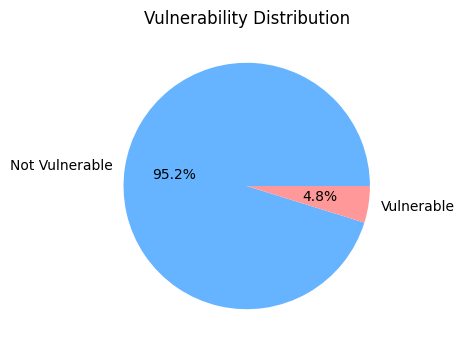

In [9]:
#build DataFrame
small_df = pd.DataFrame(small_dataset)

# Value counts
vul_counts = small_df['vul'].value_counts()

# Print raw counts
print("Vulnerability Distribution:")
print(vul_counts)

# Plot pie chart
plt.figure(figsize=(4,4))
vul_counts.plot.pie(autopct='%1.1f%%', labels=['Not Vulnerable', 'Vulnerable'], colors=['#66b3ff','#ff9999'])
plt.title('Vulnerability Distribution')
plt.ylabel('')
plt.show()

Vulnerability Distribution:
vul
0    15982
1      805
Name: count, dtype: int64


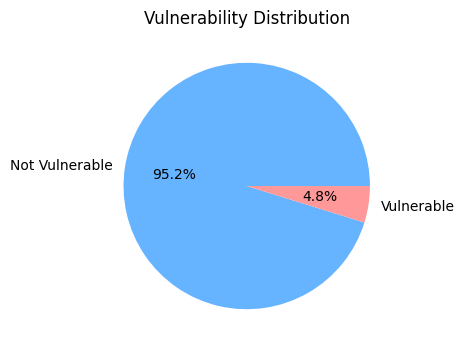

In [10]:
#data splitting
from sklearn.model_selection import train_test_split

# keep 10% for test data about 17000 samples
train_val_ds, test_dataset = train_test_split(small_dataset, test_size=0.1, random_state=42)

# Convert to DataFrame
train_val_df = pd.DataFrame(train_val_ds)

# Show first few rows
train_val_df.head()

# Value counts
vul_counts = train_val_df['vul'].value_counts()

# Print raw counts
print("Vulnerability Distribution:")
print(vul_counts)

# Plot pie chart
plt.figure(figsize=(4,4))
vul_counts.plot.pie(autopct='%1.1f%%', labels=['Not Vulnerable', 'Vulnerable'], colors=['#66b3ff','#ff9999'])
plt.title('Vulnerability Distribution')
plt.ylabel('')
plt.show()

In [11]:
# test data
# Convert to DataFrame
test_df = pd.DataFrame(test_dataset)

# Show first few rows
test_df.head()

# Value counts
vul_counts = test_df['vul'].value_counts()

# Print raw counts
print("Vulnerability Distribution:")
print(vul_counts)



Vulnerability Distribution:
vul
0    1774
1      92
Name: count, dtype: int64


In [12]:
#build up validation data

train_dataset, validation_dataset = train_test_split(train_val_ds, test_size=0.1, random_state=42)

vul_counts = pd.DataFrame(validation_dataset)['vul'].value_counts()
print(vul_counts)

print(pd.DataFrame(train_dataset)['vul'].value_counts())



vul
0    1600
1      79
Name: count, dtype: int64
vul
0    14382
1      726
Name: count, dtype: int64


**Save datasets fo further evaluations**

In [13]:
# Save datasets

small_dataset.to_csv("small_dataset",index=False)
train_dataset.to_csv("train_dataset",index=False)
validation_dataset.to_csv("validation_dataset",index=False)
test_dataset.to_csv("test_dataset",index=False)


**Loading the Saved datasets**

In [4]:
import ast
test_dataset=pd.read_csv("test_dataset", converters={'flaw_line_no': ast.literal_eval})

In [5]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaTokenizerFast, RobertaForSequenceClassification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

# --- 1) Your Dataset class, modified to return subtoken→line mapping ---

class CodeBERTDataset(Dataset):
    def __init__(self, codes, tokenizer, max_length):
        self.data       = codes
        self.tokenizer  = tokenizer
        self.max_len    = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        item = self.data.iloc[idx]
        code         = item["code"]
        vul          = item["vul"]
        flaw_line_no = item["flaw_line_no"]

        enc = self.tokenizer(
            code,
            add_special_tokens=True,
            max_length=self.max_len,
            padding="max_length",
            truncation=True,
            return_tensors="pt",
            return_offsets_mapping=True
        )
        input_ids      = enc["input_ids"].squeeze(0)        # (seq_len,)
        attention_mask = enc["attention_mask"].squeeze(0)   # (seq_len,)
        offset_mapping = enc["offset_mapping"].squeeze(0)   # (seq_len, 2)

        # Build char -> line lookup
        char_to_line = []
        current_line = 0
        for i, ch in enumerate(code):
            char_to_line.append(current_line)
            if ch == "\n":
                current_line += 1

        # Build subtoken2line- map each subtoken back to its original line number in the source code.


        subtoken2line = torch.zeros(input_ids.size(0), dtype=torch.long)
        for tok_idx in range(input_ids.size(0)):
            sc, ec = offset_mapping[tok_idx].tolist()
            if attention_mask[tok_idx].item() == 0 or (sc == ec == 0):
                subtoken2line[tok_idx] = -1
            else:
                sc = min(sc, len(char_to_line)-1)
                subtoken2line[tok_idx] = char_to_line[sc]

        return {
            "input_ids":      input_ids,
            "attention_mask": attention_mask,
            "labels":         torch.tensor(vul, dtype=torch.long),
            "code":           code,
            "offset_mapping": offset_mapping,
            "flaw_line_no":   flaw_line_no,
            "subtoken2line":  subtoken2line
        }

# --- 2) Collate function, stacking subtoken2line too ---

def custom_collate_fn(batch):
    collated_batch = {}
    collated_batch["input_ids"]      = torch.stack([item["input_ids"]      for item in batch])
    collated_batch["attention_mask"] = torch.stack([item["attention_mask"] for item in batch])
    collated_batch["labels"]         = torch.stack([item["labels"]         for item in batch])
    collated_batch["offset_mapping"] = torch.stack([item["offset_mapping"] for item in batch])
    collated_batch["subtoken2line"]  = torch.stack([item["subtoken2line"]  for item in batch])

    # Keep strings/lists as-is
    collated_batch["code"]         = [item["code"]         for item in batch]
    collated_batch["flaw_line_no"] = [item["flaw_line_no"] for item in batch]

    return collated_batch

## Training And Validation

In [16]:


lr         = 1e-5
bs         = 16
msl        = 512
max_epochs = 10
wd=0.1

device    = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = RobertaTokenizerFast.from_pretrained("microsoft/codebert-base")
model     = RobertaForSequenceClassification.from_pretrained(
                "microsoft/codebert-base",
                num_labels=2,
                output_attentions=True  # <-- request attentions here
            ).to(device)

optimizer = optim.AdamW(model.parameters(), lr=lr,weight_decay=wd)

train_ds = CodeBERTDataset(train_dataset, tokenizer, msl)
val_ds   = CodeBERTDataset(validation_dataset,   tokenizer, msl)
test_ds  = CodeBERTDataset(test_dataset,         tokenizer, msl)

train_loader = DataLoader(train_ds, batch_size=bs, shuffle=True,  collate_fn=custom_collate_fn)
val_loader   = DataLoader(val_ds,   batch_size=bs, shuffle=False, collate_fn=custom_collate_fn)
test_loader  = DataLoader(test_ds,  batch_size=bs, shuffle=False, collate_fn=custom_collate_fn)

total_steps  = len(train_loader) * max_epochs
warmup_steps = int(0.1 * total_steps)
from transformers import get_linear_schedule_with_warmup
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=warmup_steps,
    num_training_steps=total_steps,
)

#  Training + validation loop for function‐level only ---

for epoch in range(max_epochs):

    # ----- TRAIN -----
    model.train()
    train_loss   = []
    train_preds  = []
    train_labels = []

    for batch in train_loader:
        optimizer.zero_grad()

        out = model(
            input_ids=batch["input_ids"].to(device),
            attention_mask=batch["attention_mask"].to(device),
            labels=batch["labels"].to(device),
            # output_attentions=True is already set in model_init
        )
        loss = out.loss
        loss.backward()
        optimizer.step()
        scheduler.step()

        train_loss.append(loss.item())
        preds = out.logits.argmax(dim=1).cpu().tolist()
        train_preds.extend(preds)
        train_labels.extend(batch["labels"].tolist())

    avg_train_loss = sum(train_loss) / len(train_loss)
    train_acc = accuracy_score(train_labels, train_preds)
    print(f"[Epoch {epoch+1}] train_loss={avg_train_loss:.4f}, train_acc={train_acc:.3f}")

    # ----- VALIDATION (function‐level) -----
    model.eval()
    val_loss   = []
    val_preds  = []
    val_lbls   = []
    with torch.no_grad():
        for b in val_loader:
            out = model(
                input_ids=b["input_ids"].to(device),
                attention_mask=b["attention_mask"].to(device),
                labels=b["labels"].to(device)
            )
            val_loss.append(out.loss.item())
            val_logits = out.logits.cpu()
            val_preds.extend(val_logits.argmax(dim=1).tolist())
            val_lbls.extend(b["labels"].tolist())

    avg_val_loss = sum(val_loss) / len(val_loss)
    val_acc  = accuracy_score(val_lbls, val_preds)
    val_prec = precision_score(val_lbls, val_preds, zero_division=0)
    val_rec  = recall_score(val_lbls, val_preds, zero_division=0)
    val_f1   = f1_score(val_lbls, val_preds, zero_division=0)
    val_mcc  = matthews_corrcoef(val_lbls, val_preds)

    print(f"[Epoch {epoch+1}] "
          f"val_loss={avg_val_loss:.4f}, val_acc={val_acc:.3f}, "
          f"val_prec={val_prec:.3f}, val_rec={val_rec:.3f}, "
          f"val_f1={val_f1:.3f}, val_mcc={val_mcc:.3f}")

# At this point you have a trained model (fine‐tuned to maximize F1 on val set).





tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/498 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at microsoft/codebert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
RobertaSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

[Epoch 1] train_loss=0.2611, train_acc=0.881
[Epoch 1] val_loss=0.1584, val_acc=0.953, val_prec=0.000, val_rec=0.000, val_f1=0.000, val_mcc=0.000
[Epoch 2] train_loss=0.1398, train_acc=0.959
[Epoch 2] val_loss=0.1013, val_acc=0.968, val_prec=0.903, val_rec=0.354, val_f1=0.509, val_mcc=0.555
[Epoch 3] train_loss=0.0963, train_acc=0.973
[Epoch 3] val_loss=0.0656, val_acc=0.980, val_prec=0.803, val_rec=0.772, val_f1=0.787, val_mcc=0.777
[Epoch 4] train_loss=0.0829, train_acc=0.978
[Epoch 4] val_loss=0.0715, val_acc=0.980, val_prec=0.811, val_rec=0.759, val_f1=0.784, val_mcc=0.774
[Epoch 5] train_loss=0.0756, train_acc=0.980
[Epoch 5] val_loss=0.0610, val_acc=0.982, val_prec=0.810, val_rec=0.810, val_f1=0.810, val_mcc=0.801
[Epoch 6] train_loss=0.0658, train_acc=0.982
[Epoch 6] val_loss=0.0765, val_acc=0.983, val_prec=0.821, val_rec=0.810, val_f1=0.815, val_mcc=0.806
[Epoch 7] train_loss=0.0573, train_acc=0.984
[Epoch 7] val_loss=0.0620, val_acc=0.983, val_prec=0.868, val_rec=0.747, val_f1

**save training checkpoints in local storage**

In [17]:
save_directory = "saved_codebert_checkpoint"

# (1) Create the output folder if it doesn’t exist
import os
if not os.path.isdir(save_directory):
    os.makedirs(save_directory)

# (2) Save the model
model.save_pretrained(save_directory)

# (3) Save the tokenizer
tokenizer.save_pretrained(save_directory)

print(f"Saved fine-tuned model and tokenizer to: {save_directory}")


Saved fine-tuned model and tokenizer to: saved_codebert_checkpoint


**loading training checkpoints in local storage**

In [6]:


save_directory = "saved_codebert_checkpoint"
#Hyperparameters & setup ---

lr         = 2e-5
bs         = 16
msl        = 512
max_epochs = 10

# Load the tokenizer and model from that directory
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tokenizer = RobertaTokenizerFast.from_pretrained(save_directory)
model = (
    RobertaForSequenceClassification.from_pretrained(save_directory, output_attentions=True)
    .to(device)
)
test_ds  = CodeBERTDataset(test_dataset,tokenizer, msl)


test_loader  = DataLoader(test_ds,batch_size=bs, shuffle=False, collate_fn=custom_collate_fn)

# Testing - Line Level Sum score

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

model.eval()

all_fun_preds  = []
all_fun_labels = []
all_line_preds  = []
all_line_labels = []
line_level_results = []

with torch.no_grad():
    fn_global_idx = 0
    for b in test_loader:
        input_ids      = b["input_ids"].to(device)
        attention_mask = b["attention_mask"].to(device)
        labels         = b["labels"].to(device)       # (batch_size,)
        sub2line       = b["subtoken2line"]           # (batch_size, seq_len)
        flaw_lines     = b["flaw_line_no"]             # list of length batch_size

        out     = model(input_ids=input_ids,
                        attention_mask=attention_mask,
                        labels=labels)
        logits  = out.logits           # (batch_size, 2)
        fun_preds = logits.argmax(dim=1).cpu().tolist()

        #Accumulate function-level predictions/labels
        all_fun_preds.extend(fun_preds)
        all_fun_labels.extend(labels.cpu().tolist())

        #Build subtoken-level “CLS→subtoken” scores
        all_attn   = out.attentions   #is a tuple of length 12 (one tensor per Transformer layer).
        # Stack dims → (12, batch, heads, seq_len, seq_len)
        attn_tensor = torch.stack(all_attn, dim=0)
        # Sum over heads → (12, batch, seq_len, seq_len)
        attn_per_layer = attn_tensor.sum(dim=2)
        # Sum over layers → (batch, seq_len, seq_len)
        attn_sum = attn_per_layer.sum(dim=0)
        # subtoken_scores[i, j] = attention from CLS (pos 0) → subtoken j of example i
        subtoken_scores = attn_sum[:, 0, :]   # (batch_size, seq_len)

        batch_size = logits.size(0)
        for i in range(batch_size):
            # if fun_preds[i] == 1:
            #Gather subtoken‐scores for example i
            st_scores = subtoken_scores[i].cpu()     # (seq_len,)
            st2line   = sub2line[i]                  # (seq_len,)

            #Build line2subtoken‐scores map
            line2scores = {}
            for tok_idx in range(st2line.size(0)):
                ln = st2line[tok_idx].item()
                if ln < 0:
                    continue
                score_j = st_scores[tok_idx].item()
                line2scores.setdefault(ln, []).append(score_j)

            #Sum each line’s scores
            line2score_sum = {ln: sum(scores) for ln, scores in line2scores.items()}
            
            #Store for everyone
            # line2score_map[fn_global_idx] = line2score_sum

            if fun_preds[i] == 1:
                
            #Pick the line with the highest summed score
                if len(line2score_sum) > 0:
                    # sorted_lines = sorted(line2score_sum.items(),
                    #                       key=lambda x: x[1],
                    #                       reverse=True)
                    pred_line = line2score_sum

                else:
                    pred_line = -1
            else:
                # If somehow every token was padding (line2score_sum empty), pick -1
                pred_line = -1

            line_level_results.append((fn_global_idx, pred_line))
            # else:
                # Model predicted “clean” → no line predicted
                # pred_line = -1

            # e) Accumulate predicted line & true line
            # all_line_preds.append((fn_global_idx, line2score_sum))
            
            # If flaw_lines[i] is a list (e.g. [5]), take the first element; else treat it as int
            gt = flaw_lines[i]
            if isinstance(gt, (list, tuple)) and len(gt) > 0:
                true_line = gt[0]
            elif isinstance(gt, (list, tuple)) and len(gt) == 0:
                true_line = -1
            else:
                true_line = gt
            all_line_labels.append(true_line)

            fn_global_idx += 1

# Function‐level metrics (over the entire test set)

test_acc  = accuracy_score(all_fun_labels, all_fun_preds)
test_prec = precision_score(all_fun_labels, all_fun_preds, zero_division=0)
test_rec  = recall_score(all_fun_labels, all_fun_preds, zero_division=0)
test_f1   = f1_score(all_fun_labels, all_fun_preds, zero_division=0)
test_mcc  = matthews_corrcoef(all_fun_labels, all_fun_preds)
print(f"Function‐level (test) → "
      f"acc={test_acc:.3f}, prec={test_prec:.3f}, rec={test_rec:.3f}, "
      f"f1={test_f1:.3f}, mcc={test_mcc:.3f}")



# Top-K precision (e.g. K = 10)
K = 10
hits = 0
total_vul = 0
for (fn_idx, line2score_dict) in line_level_results:
    true_line = all_line_labels[fn_idx]
    if line2score_dict != -1:
        total_vul +=1
        ranked_lines = [
            ln for (ln, _) 
            in sorted(line2score_dict.items(), key=lambda x: x[1], reverse=True)
        ]
        if true_line in ranked_lines[:K]:
            hits += 1

topk_precision = hits / total_vul

print(f"Top-{K} precision (vulnerable-only) = {topk_precision:.3f}")

# Top-K recall (e.g. K = 10)
K = 10
hits = 0
total_vul=0
for (fn_idx, line2score_dict) in line_level_results:
    true_line = all_line_labels[fn_idx]
    if (line2score_dict != -1): # & (true_line !=-1)):
        total_vul +=1
        ranked_lines = [
            ln for (ln, _) 
            in sorted(line2score_dict.items(), key=lambda x: x[1], reverse=True)
        ]
        if true_line in ranked_lines[:K]:
            hits += 1

total_vul = len(all_line_labels) - all_line_labels.count(-1)
topk_recall = hits / total_vul

print(f"Top-{K} recall (vulnerable-only) = {topk_recall:.3f}")

import statistics
# Initial False Alarm (IFA)
ifa_list = []
for (fn_idx, line2score_dict) in line_level_results:
    true_line = all_line_labels[fn_idx]
    if (line2score_dict != -1):
        ranked_lines = [
            ln for (ln, _) 
            in sorted(line2score_dict.items(), key=lambda x: x[1], reverse=True)
        ]
        if true_line in ranked_lines:
            pos = ranked_lines.index(true_line)
        else:
            pos = len(ranked_lines)
        ifa_list.append(pos)

if len(ifa_list) > 0:
    avg_ifa = sum(ifa_list) / len(ifa_list)
    med_ifa = statistics.median(ifa_list)
else:
    avg_ifa = 0.0

print(f"Initial False Alarm (average) = {avg_ifa:.2f} lines before true flaw")
print(f"Initial False Alarm (median) = {med_ifa:.2f} lines before true flaw")

Function‐level (test) → acc=0.983, prec=0.895, rec=0.739, f1=0.810, mcc=0.805
Top-10 precision (vulnerable-only) = 0.632
Top-10 recall (vulnerable-only) = 0.522
Initial False Alarm (average) = 8.51 lines before true flaw
Initial False Alarm (median) = 5.50 lines before true flaw


# Testing - Line Level Max score

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

model.eval()

all_fun_preds  = []
all_fun_labels = []
all_line_preds  = []
all_line_labels = []
line_level_results = []

with torch.no_grad():
    fn_global_idx = 0
    for b in test_loader:
        input_ids      = b["input_ids"].to(device)
        attention_mask = b["attention_mask"].to(device)
        labels         = b["labels"].to(device)       # (batch_size,)
        sub2line       = b["subtoken2line"]           # (batch_size, seq_len)
        flaw_lines     = b["flaw_line_no"]             # list of length batch_size

        out     = model(input_ids=input_ids,
                        attention_mask=attention_mask,
                        labels=labels)
        logits  = out.logits           # (batch_size, 2)
        fun_preds = logits.argmax(dim=1).cpu().tolist()

        #Accumulate function-level predictions/labels
        all_fun_preds.extend(fun_preds)
        all_fun_labels.extend(labels.cpu().tolist())

        #Build subtoken-level “CLS→subtoken” scores
        all_attn   = out.attentions   #is a tuple of length 12 (one tensor per Transformer layer).
        # Stack dims → (12, batch, heads, seq_len, seq_len)
        attn_tensor = torch.stack(all_attn, dim=0)
        # avg over heads → (12, batch, seq_len, seq_len)
        attn_per_layer = attn_tensor.sum(dim=2)
        # Sum over layers → (batch, seq_len, seq_len)
        attn_avg = attn_per_layer.sum(dim=0)
        # subtoken_scores[i, j] = attention from CLS (pos 0) → subtoken j of example i
        subtoken_scores = attn_avg[:, 0, :]   # (batch_size, seq_len)

        batch_size = logits.size(0)
        for i in range(batch_size):
            # if fun_preds[i] == 1:
            #Gather subtoken‐scores for example i
            st_scores = subtoken_scores[i].cpu()     # (seq_len,)
            st2line   = sub2line[i]                  # (seq_len,)

            #Build line2subtoken‐scores map
            line2scores = {}
            for tok_idx in range(st2line.size(0)):
                ln = st2line[tok_idx].item()
                if ln < 0:
                    continue
                score_j = st_scores[tok_idx].item()
                line2scores.setdefault(ln, []).append(score_j)

            #Sum each line’s scores
            line2score_sum = {ln: max(scores) for ln, scores in line2scores.items()}
            
            #Store for everyone
            # line2score_map[fn_global_idx] = line2score_sum

            if fun_preds[i] == 1:
                
            #Pick the line with the highest summed score
                if len(line2score_sum) > 0:
                    # sorted_lines = sorted(line2score_sum.items(),
                    #                       key=lambda x: x[1],
                    #                       reverse=True)
                    pred_line = line2score_sum

                else:
                    pred_line = -1
            else:
                # If somehow every token was padding (line2score_sum empty), pick -1
                pred_line = -1

            line_level_results.append((fn_global_idx, pred_line))
            # else:
                # Model predicted “clean” → no line predicted
                # pred_line = -1

            # e) Accumulate predicted line & true line
            # all_line_preds.append((fn_global_idx, line2score_sum))
            
            # If flaw_lines[i] is a list (e.g. [5]), take the first element; else treat it as int
            gt = flaw_lines[i]
            if isinstance(gt, (list, tuple)) and len(gt) > 0:
                true_line = gt[0]
            elif isinstance(gt, (list, tuple)) and len(gt) == 0:
                true_line = -1
            else:
                true_line = gt
            all_line_labels.append(true_line)

            fn_global_idx += 1

# Function‐level metrics (over the entire test set)
test_acc  = accuracy_score(all_fun_labels, all_fun_preds)
test_prec = precision_score(all_fun_labels, all_fun_preds, zero_division=0)
test_rec  = recall_score(all_fun_labels, all_fun_preds, zero_division=0)
test_f1   = f1_score(all_fun_labels, all_fun_preds, zero_division=0)
test_mcc  = matthews_corrcoef(all_fun_labels, all_fun_preds)
print(f"Function‐level (test) → "
      f"acc={test_acc:.3f}, prec={test_prec:.3f}, rec={test_rec:.3f}, "
      f"f1={test_f1:.3f}, mcc={test_mcc:.3f}")



# Top-K precision (e.g. K = 10)
K = 10
hits = 0
total_vul = 0
for (fn_idx, line2score_dict) in line_level_results:
    true_line = all_line_labels[fn_idx]
    if line2score_dict != -1:
        total_vul +=1
        ranked_lines = [
            ln for (ln, _) 
            in sorted(line2score_dict.items(), key=lambda x: x[1], reverse=True)
        ]
        if true_line in ranked_lines[:K]:
            hits += 1

topk_precision = hits / total_vul

print(f"Top-{K} precision (vulnerable-only) = {topk_precision:.3f}")

# Top-K recall (e.g. K = 10)
K = 10
hits = 0
total_vul=0
for (fn_idx, line2score_dict) in line_level_results:
    true_line = all_line_labels[fn_idx]
    if (line2score_dict != -1): # & (true_line !=-1)):
        total_vul +=1
        ranked_lines = [
            ln for (ln, _) 
            in sorted(line2score_dict.items(), key=lambda x: x[1], reverse=True)
        ]
        if true_line in ranked_lines[:K]:
            hits += 1

total_vul = len(all_line_labels) - all_line_labels.count(-1)
topk_recall = hits / total_vul

print(f"Top-{K} recall (vulnerable-only) = {topk_recall:.3f}")

import statistics
# Initial False Alarm (IFA)
ifa_list = []
for (fn_idx, line2score_dict) in line_level_results:
    true_line = all_line_labels[fn_idx]
    if (line2score_dict != -1):
        ranked_lines = [
            ln for (ln, _) 
            in sorted(line2score_dict.items(), key=lambda x: x[1], reverse=True)
        ]
        if true_line in ranked_lines:
            pos = ranked_lines.index(true_line)
        else:
            pos = len(ranked_lines)
        ifa_list.append(pos)

if len(ifa_list) > 0:
    avg_ifa = sum(ifa_list) / len(ifa_list)
    med_ifa = statistics.median(ifa_list)
else:
    avg_ifa = 0.0

print(f"Initial False Alarm (average) = {avg_ifa:.2f} lines before true flaw")
print(f"Initial False Alarm (median) = {med_ifa:.2f} lines before true flaw")

Function‐level (test) → acc=0.983, prec=0.895, rec=0.739, f1=0.810, mcc=0.805
Top-10 precision (vulnerable-only) = 0.447
Top-10 recall (vulnerable-only) = 0.370
Initial False Alarm (average) = 10.87 lines before true flaw
Initial False Alarm (median) = 8.50 lines before true flaw


# Testing - Line Level average score

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

model.eval()

all_fun_preds  = []
all_fun_labels = []
all_line_preds  = []
all_line_labels = []
line_level_results = []

with torch.no_grad():
    fn_global_idx = 0
    for b in test_loader:
        input_ids      = b["input_ids"].to(device)
        attention_mask = b["attention_mask"].to(device)
        labels         = b["labels"].to(device)       # (batch_size,)
        sub2line       = b["subtoken2line"]           # (batch_size, seq_len)
        flaw_lines     = b["flaw_line_no"]             # list of length batch_size

        out     = model(input_ids=input_ids,
                        attention_mask=attention_mask,
                        labels=labels)
        logits  = out.logits           # (batch_size, 2)
        fun_preds = logits.argmax(dim=1).cpu().tolist()

        #Accumulate function-level predictions/labels
        all_fun_preds.extend(fun_preds)
        all_fun_labels.extend(labels.cpu().tolist())

        #Build subtoken-level “CLS→subtoken” scores
        all_attn   = out.attentions   #is a tuple of length 12 (one tensor per Transformer layer).
        # Stack dims → (12, batch, heads, seq_len, seq_len)
        attn_tensor = torch.stack(all_attn, dim=0)
        # avg over heads → (12, batch, seq_len, seq_len)
        attn_per_layer = attn_tensor.sum(dim=2)
        # Sum over layers → (batch, seq_len, seq_len)
        attn_sum = attn_per_layer.sum(dim=0)
        # subtoken_scores[i, j] = attention from CLS (pos 0) → subtoken j of example i
        subtoken_scores = attn_sum[:, 0, :]   # (batch_size, seq_len)

        batch_size = logits.size(0)
        for i in range(batch_size):
            # if fun_preds[i] == 1:
            #Gather subtoken‐scores for example i
            st_scores = subtoken_scores[i].cpu()     # (seq_len,)
            st2line   = sub2line[i]                  # (seq_len,)

            #Build line2subtoken‐scores map
            line2scores = {}
            for tok_idx in range(st2line.size(0)):
                ln = st2line[tok_idx].item()
                if ln < 0:
                    continue
                score_j = st_scores[tok_idx].item()
                line2scores.setdefault(ln, []).append(score_j)

            #avg each line’s scores
            line2score_sum = {ln: (sum(scores)/len(scores)) for ln, scores in line2scores.items()}
            
            #Store for everyone
            # line2score_map[fn_global_idx] = line2score_sum

            if fun_preds[i] == 1:
                
            #Pick the line with the highest summed score
                if len(line2score_sum) > 0:
                    # sorted_lines = sorted(line2score_sum.items(),
                    #                       key=lambda x: x[1],
                    #                       reverse=True)
                    pred_line = line2score_sum

                else:
                    pred_line = -1
            else:
                # If somehow every token was padding (line2score_sum empty), pick -1
                pred_line = -1

            line_level_results.append((fn_global_idx, pred_line))
            # else:
                # Model predicted “clean” → no line predicted
                # pred_line = -1

            # e) Accumulate predicted line & true line
            # all_line_preds.append((fn_global_idx, line2score_sum))
            
            # If flaw_lines[i] is a list (e.g. [5]), take the first element; else treat it as int
            gt = flaw_lines[i]
            if isinstance(gt, (list, tuple)) and len(gt) > 0:
                true_line = gt[0]
            elif isinstance(gt, (list, tuple)) and len(gt) == 0:
                true_line = -1
            else:
                true_line = gt
            all_line_labels.append(true_line)

            fn_global_idx += 1

# ----------------------------------------------------------------------------
# Function‐level metrics (over the entire test set)
# ----------------------------------------------------------------------------
test_acc  = accuracy_score(all_fun_labels, all_fun_preds)
test_prec = precision_score(all_fun_labels, all_fun_preds, zero_division=0)
test_rec  = recall_score(all_fun_labels, all_fun_preds, zero_division=0)
test_f1   = f1_score(all_fun_labels, all_fun_preds, zero_division=0)
test_mcc  = matthews_corrcoef(all_fun_labels, all_fun_preds)
print(f"Function‐level (test) → "
      f"acc={test_acc:.3f}, prec={test_prec:.3f}, rec={test_rec:.3f}, "
      f"f1={test_f1:.3f}, mcc={test_mcc:.3f}")



# Top-K precision (e.g. K = 10)
K = 10
hits = 0
total_vul = 0
for (fn_idx, line2score_dict) in line_level_results:
    true_line = all_line_labels[fn_idx]
    if line2score_dict != -1:
        total_vul +=1
        ranked_lines = [
            ln for (ln, _) 
            in sorted(line2score_dict.items(), key=lambda x: x[1], reverse=True)
        ]
        if true_line in ranked_lines[:K]:
            hits += 1

topk_precision = hits / total_vul

print(f"Top-{K} precision (vulnerable-only) = {topk_precision:.3f}")

# Top-K recall (e.g. K = 10)
K = 10
hits = 0
total_vul=0
for (fn_idx, line2score_dict) in line_level_results:
    true_line = all_line_labels[fn_idx]
    if (line2score_dict != -1): # & (true_line !=-1)):
        total_vul +=1
        ranked_lines = [
            ln for (ln, _) 
            in sorted(line2score_dict.items(), key=lambda x: x[1], reverse=True)
        ]
        if true_line in ranked_lines[:K]:
            hits += 1

total_vul = len(all_line_labels) - all_line_labels.count(-1)
topk_recall = hits / total_vul

print(f"Top-{K} recall (vulnerable-only) = {topk_recall:.3f}")

import statistics
# Initial False Alarm (IFA)
ifa_list = []
for (fn_idx, line2score_dict) in line_level_results:
    true_line = all_line_labels[fn_idx]
    if (line2score_dict != -1):
        ranked_lines = [
            ln for (ln, _) 
            in sorted(line2score_dict.items(), key=lambda x: x[1], reverse=True)
        ]
        if true_line in ranked_lines:
            pos = ranked_lines.index(true_line)
        else:
            pos = len(ranked_lines)
        ifa_list.append(pos)

if len(ifa_list) > 0:
    avg_ifa = sum(ifa_list) / len(ifa_list)
    med_ifa = statistics.median(ifa_list)
else:
    avg_ifa = 0.0

print(f"Initial False Alarm (average) = {avg_ifa:.2f} lines before true flaw")
print(f"Initial False Alarm (median) = {med_ifa:.2f} lines before true flaw")

Function‐level (test) → acc=0.983, prec=0.895, rec=0.739, f1=0.810, mcc=0.805
Top-10 precision (vulnerable-only) = 0.408
Top-10 recall (vulnerable-only) = 0.337
Initial False Alarm (average) = 13.04 lines before true flaw
Initial False Alarm (median) = 10.00 lines before true flaw


# Metric Definition Tests

In [61]:
# Top-K precision (e.g. K = 10)
K = 10
hits = 0
total_vul = 0
for (fn_idx, line2score_dict) in line_level_results:
    true_line = all_line_labels[fn_idx]
    if line2score_dict != -1:
        total_vul +=1
        ranked_lines = [
            ln for (ln, _) 
            in sorted(line2score_dict.items(), key=lambda x: x[1], reverse=True)
        ]
        if true_line in ranked_lines[:K]:
            hits += 1

topk_precision = hits / total_vul

print(f"Top-{K} precision (vulnerable-only) = {topk_precision:.3f}")

Top-10 precision (vulnerable-only) = 0.632


In [74]:
# Top-K recall (e.g. K = 10)
K = 10
hits = 0
total_vul=0
for (fn_idx, line2score_dict) in line_level_results:
    true_line = all_line_labels[fn_idx]
    if (line2score_dict != -1): # & (true_line !=-1)):
        total_vul +=1
        ranked_lines = [
            ln for (ln, _) 
            in sorted(line2score_dict.items(), key=lambda x: x[1], reverse=True)
        ]
        if true_line in ranked_lines[:K]:
            hits += 1

total_vul = len(all_line_labels) - all_line_labels.count(-1)
topk_recall = hits / total_vul

print(f"Top-{K} recall (vulnerable-only) = {topk_recall:.3f}")


Top-10 recall (vulnerable-only) = 0.522


In [78]:
import statistics
# Initial False Alarm (IFA)
ifa_list = []
for (fn_idx, line2score_dict) in line_level_results:
    true_line = all_line_labels[fn_idx]
    if (line2score_dict != -1):
        ranked_lines = [
            ln for (ln, _) 
            in sorted(line2score_dict.items(), key=lambda x: x[1], reverse=True)
        ]
        if true_line in ranked_lines:
            pos = ranked_lines.index(true_line)
        else:
            pos = len(ranked_lines)
        ifa_list.append(pos)

if len(ifa_list) > 0:
    avg_ifa = sum(ifa_list) / len(ifa_list)
    med_ifa = statistics.median(ifa_list)
else:
    avg_ifa = 0.0

print(f"Initial False Alarm (average) = {avg_ifa:.2f} lines before true flaw")
print(f"Initial False Alarm (median) = {med_ifa:.2f} lines before true flaw")

Initial False Alarm (average) = 8.51 lines before true flaw
Initial False Alarm (median) = 5.50 lines before true flaw


In [36]:
# Top-K precision (e.g. K = 10)
K = 10
hits = 0
total_vul = 0
for (fn_idx, line2score_dict) in line_level_results:
    true_line = all_line_labels[fn_idx]
    # if true_line < 0:
    #     continue
    total_vul += 1
    ranked_lines = [
        ln for (ln, _) 
        in sorted(line2score_dict.items(), key=lambda x: x[1], reverse=True)
    ]
    if true_line in ranked_lines[:K]:
        hits += 1

if total_vul > 0:
    topk_precision = hits / total_vul
else:
    topk_precision = 0.0

print(f"Top-{K} precision (vulnerable-only) = {topk_precision:.3f}")

print(total_vul)

Top-10 precision (vulnerable-only) = 0.632
76
